<a href="https://colab.research.google.com/github/APAJanssen/BioInformaticaLST/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Import modules

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

Transform the images to normalised vectors:

In [ ]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

Using device: cuda


Download and load the datasets:

In [ ]:
trainset = datasets.MNIST('traindata', download=True, train=True, transform=transform)
valset = datasets.MNIST('testdata', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.61MB/s]


Extracting traindata/MNIST/raw/train-images-idx3-ubyte.gz to traindata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]


Extracting traindata/MNIST/raw/train-labels-idx1-ubyte.gz to traindata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:06<00:00, 242kB/s]


Extracting traindata/MNIST/raw/t10k-images-idx3-ubyte.gz to traindata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.48MB/s]


Extracting traindata/MNIST/raw/t10k-labels-idx1-ubyte.gz to traindata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.09MB/s]


Extracting testdata/MNIST/raw/train-images-idx3-ubyte.gz to testdata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 65.1kB/s]


Extracting testdata/MNIST/raw/train-labels-idx1-ubyte.gz to testdata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:06<00:00, 246kB/s]


Extracting testdata/MNIST/raw/t10k-images-idx3-ubyte.gz to testdata/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.99MB/s]

Extracting testdata/MNIST/raw/t10k-labels-idx1-ubyte.gz to testdata/MNIST/raw



images, labels = next(iter(trainloader))

print(images.shape)
print(labels.shape)

Display a grid of sample images:

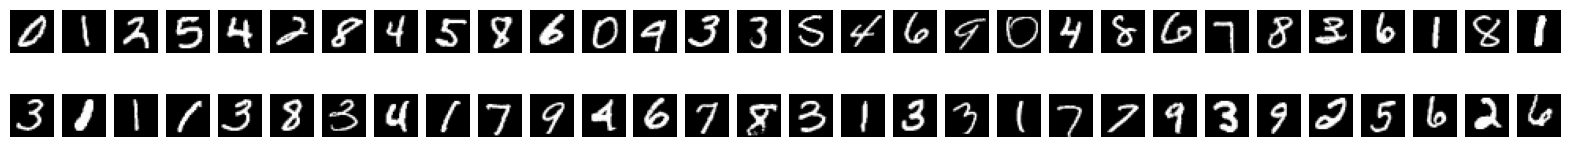

In [ ]:
images, labels = next(iter(trainloader))
figure = plt.figure(figsize=(20,2))
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(2, 30, index)
    plt.axis('off')
    plt.imshow(-images[index].numpy().squeeze(), cmap='gray_r')

### Now we start defining a model

In [ ]:
# Define a CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)  # Conv Layer 1
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # Conv Layer 2
        self.pool = nn.MaxPool2d(2, 2)  # Pooling Layer
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # Fully Connected Layer
        self.fc2 = nn.Linear(128, 10)  # Output Layer

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
model = CNN().to(device)  # Move model to GPU if available

We will also need a Cost function:

In [ ]:
criterion = nn.CrossEntropyLoss()

### Now let's train the network!

Define an optimizer strategy: SGD

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Now run it for N epochs:

In [ ]:
time0 = time()
epochs = 20
lossforplot = []
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)  # Move to GPU
        # Training pass
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")
    lossforplot.append(running_loss/len(trainloader))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 1, Loss: 0.056879378130425144
Epoch 2, Loss: 0.03909046453718436
Epoch 3, Loss: 0.030777252350275074
Epoch 4, Loss: 0.023005785208634427
Epoch 5, Loss: 0.01906061809237912
Epoch 6, Loss: 0.015468414172961674
Epoch 7, Loss: 0.011792993659456812
Epoch 8, Loss: 0.011433223917734714
Epoch 9, Loss: 0.009299758066767675
Epoch 10, Loss: 0.007666731062237784
Epoch 11, Loss: 0.005950024564523121
Epoch 12, Loss: 0.005630949642445235
Epoch 13, Loss: 0.005438871849031787
Epoch 14, Loss: 0.006970091462466059
Epoch 15, Loss: 0.004456885003170696
Epoch 16, Loss: 0.004274689463006119
Epoch 17, Loss: 0.0049085893061441704
Epoch 18, Loss: 0.004603509026411127
Epoch 19, Loss: 0.0024536827890592108
Epoch 20, Loss: 0.003494012932250674
Epoch 21, Loss: 0.006604418952344638
Epoch 22, Loss: 0.001322095557057747
Epoch 23, Loss: 0.006410239706131226
Epoch 24, Loss: 0.003283568054773557
Epoch 25, Loss: 0.002130522705286649
Epoch 26, Loss: 0.003958051078347417
Epoch 27, Loss: 0.0021029582100097776
Epoch 28,

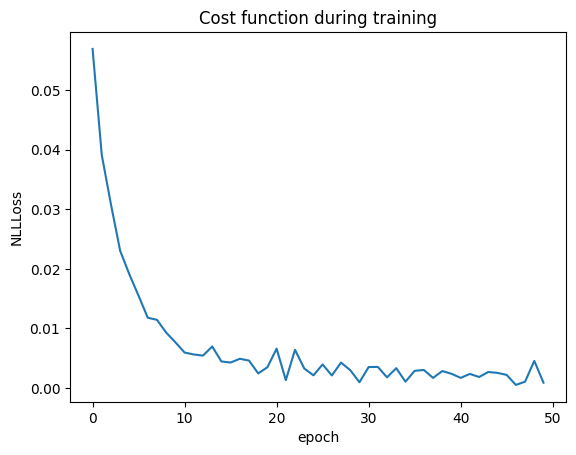

In [ ]:
xs = [x for x in range(len(lossforplot))]

plt.plot(xs, lossforplot)
plt.xlabel('epoch')
plt.ylabel('NLLLoss')
plt.title('Cost function during training')
plt.show()

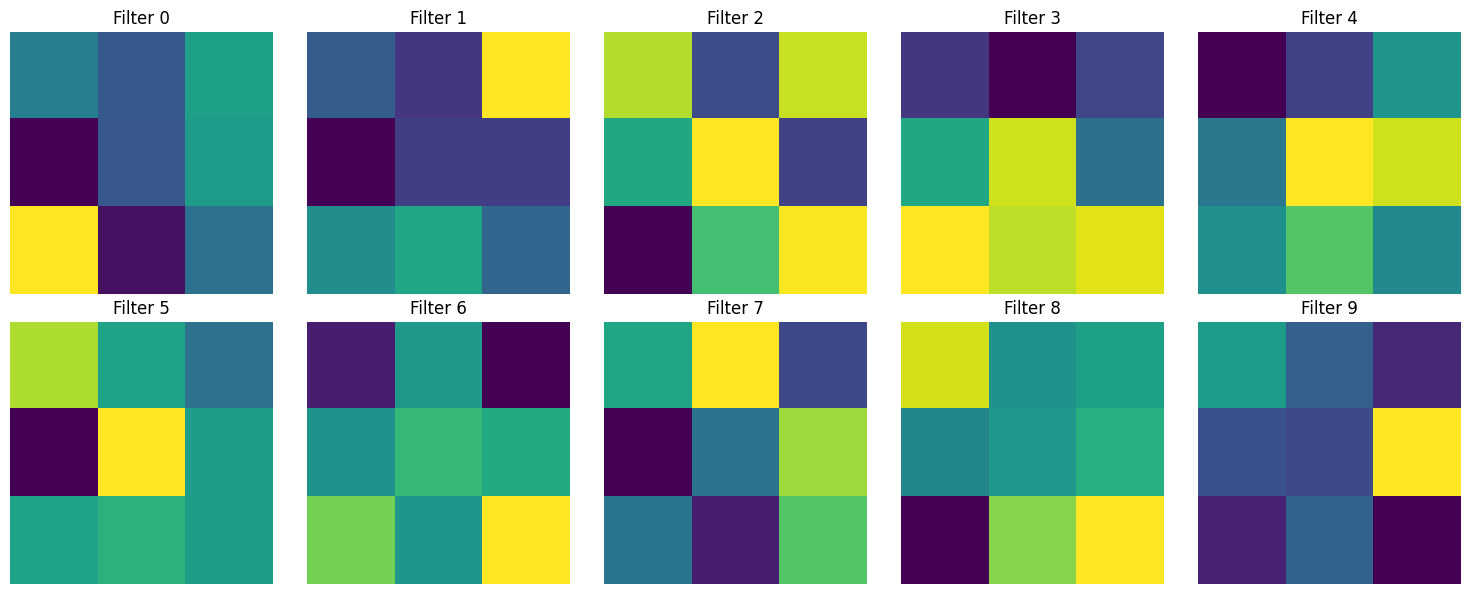

In [ ]:
# Move weights to CPU and detach from computation graph
weights = model.conv2.weight.detach().cpu().numpy()  # Change `conv1` to any desired layer

# Create subplots to visualize multiple filters
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Adjust layout as needed

for i in range(10):  # Display the first 10 filters
    row, col = divmod(i, 5)  # Compute row and column index
    axes[row, col].imshow(weights[i, 0])  # Select filter and show
    axes[row, col].set_title(f'Filter {i}')
    axes[row, col].axis('off')  # Hide axes for better visualization

plt.tight_layout()
plt.show()

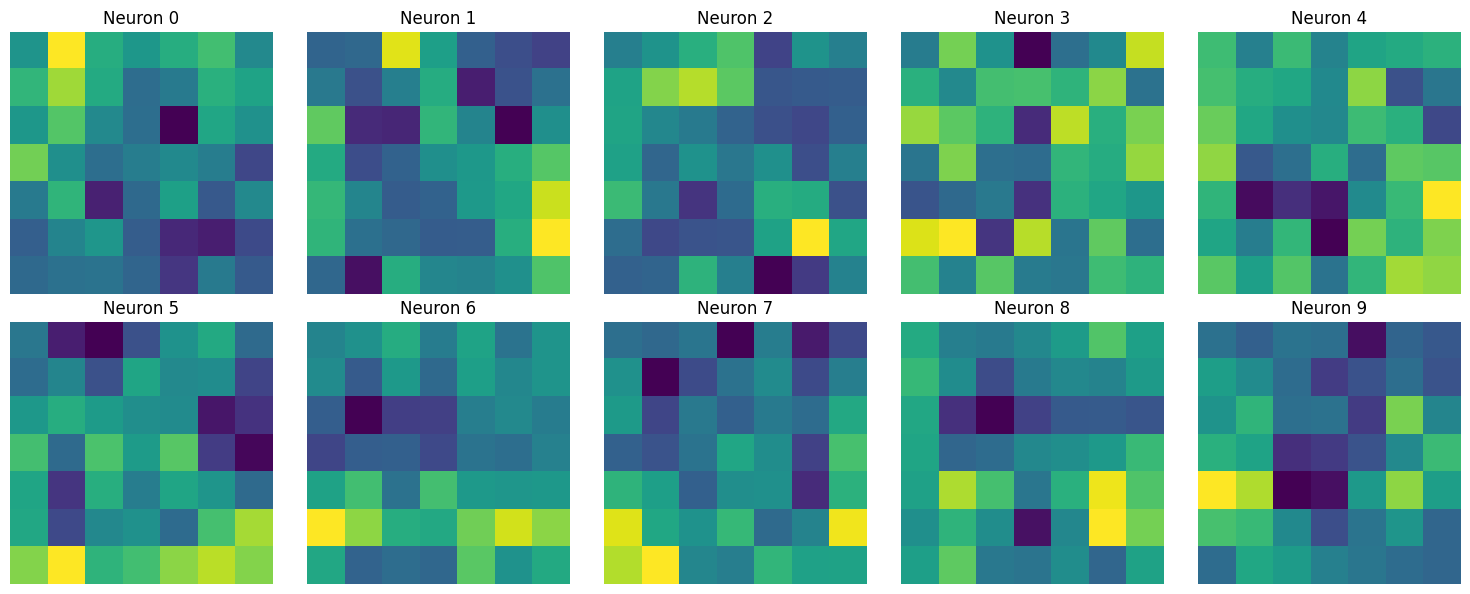

In [ ]:
# Move weights to CPU and detach from computation graph
weights = model.fc1.weight.detach().cpu().numpy()  # Shape: (128, 1568)

# Reshape the first neuron's weights back to (32, 7, 7) since the previous layer had 32 channels
weights = weights[:10].reshape(10, 32, 7, 7)  # Reshape the first 10 neurons

# Plot 10 neurons
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):  # First 10 neurons
    row, col = divmod(i, 5)
    axes[row, col].imshow(weights[i].mean(axis=0))  # Average over 32 channels
    axes[row, col].set_title(f'Neuron {i}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

Save the model for posterity:

In [ ]:
# Additional information
EPOCH = epochs-1
PATH = "my_mnist_model.pt"
LOSS = running_loss

torch.save({
            'epoch': EPOCH,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': LOSS,
            }, PATH)

# Testing time!

N=1:

In [ ]:
#Define a helper function for a nice way of visualising the prediction
def view_classify(img, ps):
    ''' Function for viewing an image and its predicted classes. '''
    ps = ps.cpu().numpy().squeeze()  # Move tensor to CPU & convert to NumPy

    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)

    # Show the image correctly shaped
    ax1.imshow(img.squeeze().cpu().numpy(), cmap='gray_r')
    ax1.axis('off')

    # Plot the class probability
    ax2.barh(np.arange(10), ps)
    ax2.invert_yaxis()
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    plt.show()

Predicted Digit = 2


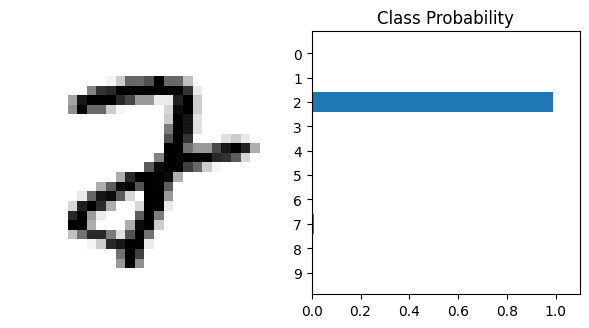

In [ ]:
# Select an image from the validation dataset
images, labels = next(iter(valloader))

# Move image to GPU if available
img = images[0].unsqueeze(0).to(device)  # Ensure it's (1,1,28,28)

# Get model prediction
with torch.no_grad():
    logps = model(img)

ps = torch.softmax(logps, dim=1)  # Convert logits to probabilities

# Print predicted class
probab = list(ps.cpu().numpy()[0])  # Move tensor to CPU
print("Predicted Digit =", probab.index(max(probab)))

# Visualize classification
view_classify(img.cpu().squeeze(), ps)

Now for a larger testset (10000):

In [ ]:
# Ensure model is in evaluation mode
model.eval()

# Initialize counters
correct_count, all_count = 0, 0

# Move model to correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with torch.no_grad():  # No need to compute gradients during inference
    for images, labels in valloader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU if available

        # Get model predictions
        logps = model(images)
        ps = torch.softmax(logps, dim=1)  # Apply softmax to get probabilities
        pred_labels = torch.argmax(ps, dim=1)  # Get the class with highest probability

        # Update counters
        correct_count += (pred_labels == labels).sum().item()
        all_count += labels.size(0)

# Print results
print("Number of Images Tested =", all_count)
print("Model Accuracy = {:.2f}%".format((correct_count / all_count) * 100))

Number of Images Tested = 10000
Model Accuracy = 99.25%


Show some samples of mistakes:

Predicted Digit = 9 while it should be 8


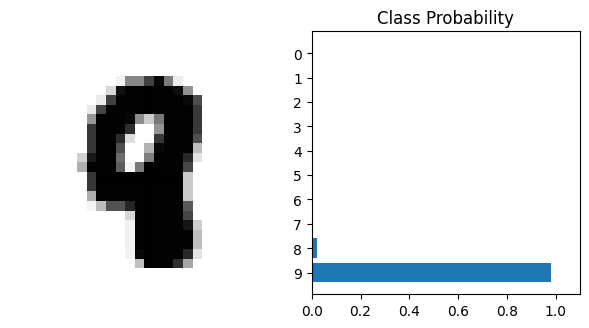

Predicted Digit = 1 while it should be 6


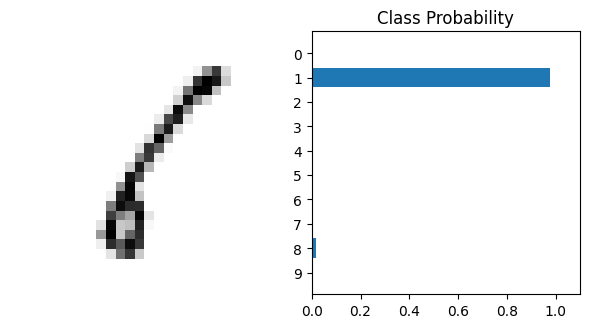

Predicted Digit = 0 while it should be 6


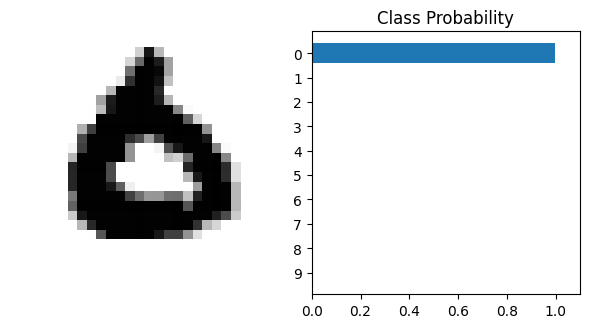

Predicted Digit = 3 while it should be 1


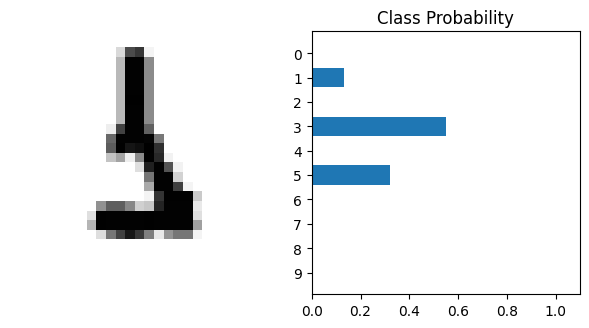

Predicted Digit = 1 while it should be 2


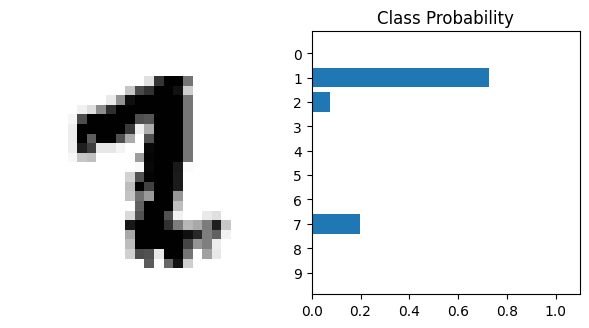

Predicted Digit = 5 while it should be 3


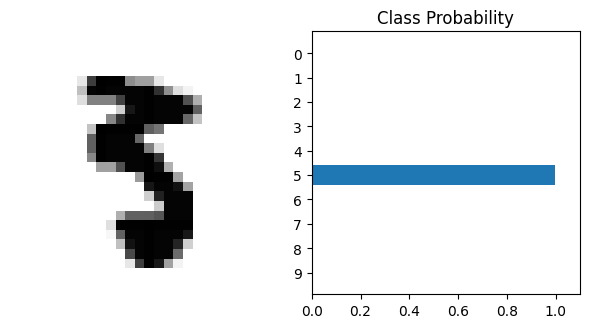

Predicted Digit = 3 while it should be 1


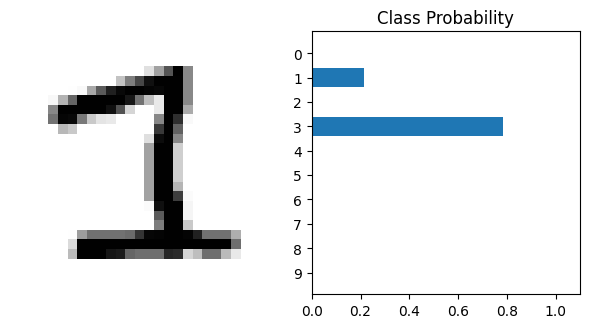

Predicted Digit = 9 while it should be 4


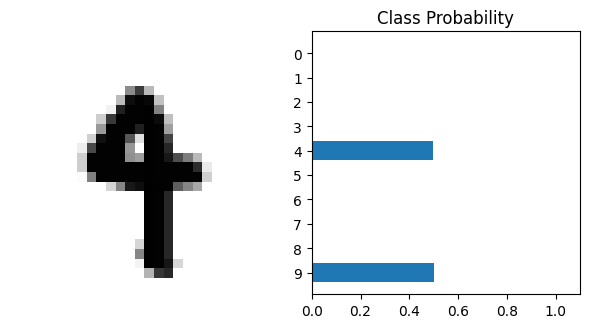

Predicted Digit = 7 while it should be 2


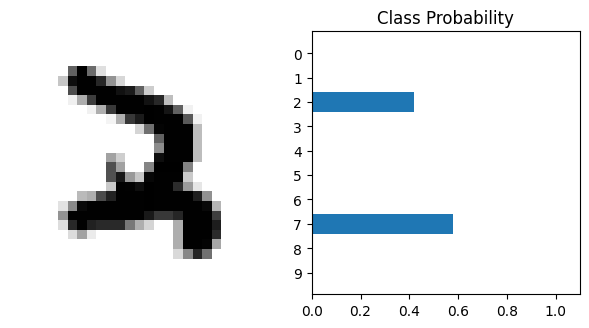

Predicted Digit = 0 while it should be 6


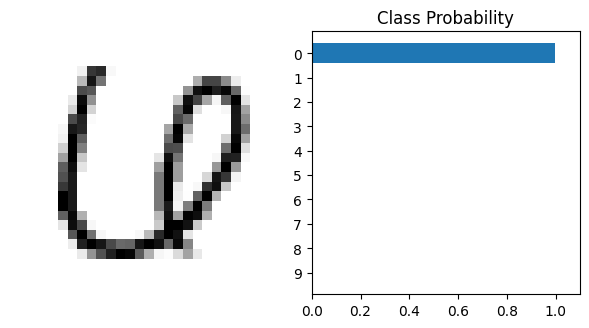

In [ ]:
# Ensure model is in evaluation mode
model.eval()

# Initialize counters
mistakes = []

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Process the dataset
with torch.no_grad():  # No need for gradient computation
    for images, labels in valloader:
        images, labels = images.to(device), labels.to(device)  # Move to GPU if available

        # Get predictions
        logps = model(images)
        ps = torch.softmax(logps, dim=1)  # Convert logits to probabilities
        pred_labels = torch.argmax(ps, dim=1)  # Get predicted class

        # Identify mistakes
        incorrect_indices = (pred_labels != labels).nonzero(as_tuple=True)[0]  # Get indices of incorrect predictions

        for idx in incorrect_indices[:10 - len(mistakes)]:  # Limit to 10 mistakes
            img = images[idx].cpu().squeeze()  # Move to CPU and remove batch dimension
            pred_label = pred_labels[idx].item()
            true_label = labels[idx].item()
            print(f"Predicted Digit = {pred_label} while it should be {true_label}")
            view_classify(img, ps[idx].cpu())  # Display misclassified image

            mistakes.append((img, pred_label, true_label))  # Store mistake

        # Stop early if we have visualized 10 mistakes
        if len(mistakes) >= 10:
            break